In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import jdatetime  # For Persian date conversion in BenefactorsData

In [28]:
# Load datasets
benefactors_df = pd.read_csv('./datasets/BenefactorsData.csv')
transactional_df = pd.read_csv('./datasets/TransactionalData.csv')

benefactors_df, transactional_df

(        Unnamed: 0  UserID Gender  State   BirthDate  ReferralSource
 0                0       3     زن  تهران  1363-08-16   Acquaintances
 1                1       8    مرد  تهران  1364-06-24   Acquaintances
 2                2      14    مرد  تهران  1356-07-07   Acquaintances
 3                3      17     زن  تهران  1325-07-23   Acquaintances
 4                4      18     زن  تهران  1334-10-06   Acquaintances
 ...            ...     ...    ...    ...         ...             ...
 278381      278381  262139    مرد  تهران  1357-04-10     Application
 278382      278382  262140    مرد  تهران  1354-10-01     Application
 278383      278383  262141    مرد   فارس  1373-05-31     Application
 278384      278384  262142     زن  البرز         NaN  Advertisements
 278385      278385  262143    مرد  تهران  1350-01-12        Agencies
 
 [278386 rows x 6 columns],
          Unnamed: 0  TransID  UserID PaymentDate  PaymentAmount  \
 0                 0   850001  174731  2016-03-20         2000

## Data Cleaning

In [29]:
# Convert Persian dates to Gregorian (only for BenefactorsData)
def persian_to_gregorian(persian_date):
    if pd.isna(persian_date) or persian_date == '':
        return None
    try:
        year, month, day = map(int, persian_date.split('-'))
        j_date = jdatetime.date(year, month, day)
        g_date = j_date.togregorian()
        return g_date.strftime('%Y-%m-%d')
    except:
        return None

benefactors_df['BirthDate_Gregorian'] = benefactors_df['BirthDate'].apply(persian_to_gregorian)
benefactors_df = benefactors_df.drop(columns=['Unnamed: 0'], errors='ignore')
transactional_df = transactional_df.drop(columns=['Unnamed: 0'], errors='ignore')

In [30]:
print(benefactors_df['BirthDate'].describe())


count         221817
unique         25355
top       1299-12-29
freq             472
Name: BirthDate, dtype: object



=== Benefactors Data Overview ===
Shape: (278386, 6)
Columns: ['UserID', 'Gender', 'State', 'BirthDate', 'ReferralSource', 'BirthDate_Gregorian']
Numerical columns: ['UserID']
Categorical columns: ['Gender', 'State', 'BirthDate', 'ReferralSource', 'BirthDate_Gregorian']

Summary Statistics:
               UserID  Gender   State   BirthDate ReferralSource  \
count   278386.000000  278149  278386      221817         278386   
unique            NaN       2      33       25355              8   
top               NaN     مرد   تهران  1299-12-29        Unknown   
freq              NaN  143197  229060         472         131614   
mean    139192.500000     NaN     NaN         NaN            NaN   
std      80363.260357     NaN     NaN         NaN            NaN   
min          0.000000     NaN     NaN         NaN            NaN   
25%      69596.250000     NaN     NaN         NaN            NaN   
50%     139192.500000     NaN     NaN         NaN            NaN   
75%     208788.750000     N

C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\249337614.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


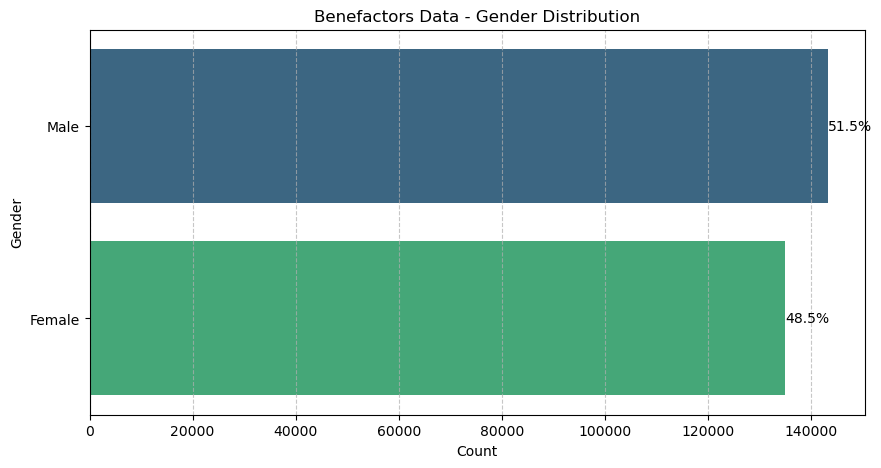

C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\249337614.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


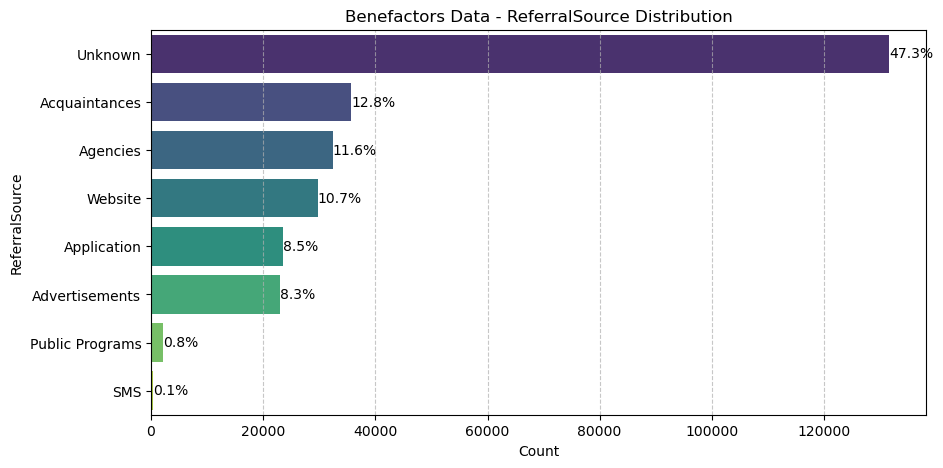

C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\249337614.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='State_Grouped', data=df, order=state_order, palette="coolwarm")


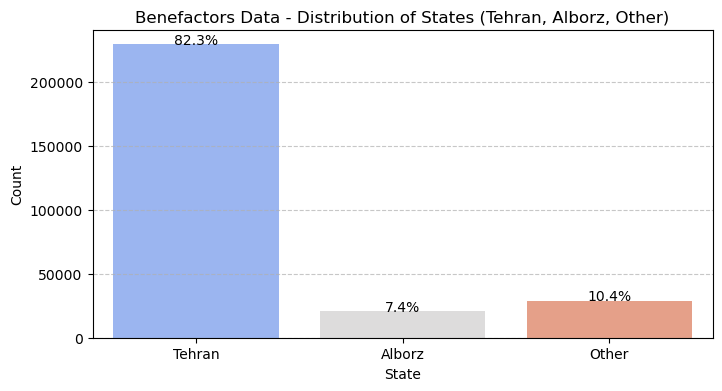


=== Transactional Data Overview ===
Shape: (1490797, 5)
Columns: ['TransID', 'UserID', 'PaymentDate', 'PaymentAmount', 'SupportType']
Numerical columns: ['TransID', 'UserID', 'PaymentAmount']
Categorical columns: ['PaymentDate', 'SupportType']

Summary Statistics:
             TransID        UserID PaymentDate  PaymentAmount     SupportType
count   1.490797e+06  1.490797e+06     1490797   1.490797e+06         1490797
unique           NaN           NaN         888            NaN               5
top              NaN           NaN  2017-06-25            NaN  Membership Fee
freq             NaN           NaN        3644            NaN         1040930
mean    1.595403e+06  1.435787e+05         NaN   9.768281e+05             NaN
std     4.303581e+05  7.724731e+04         NaN   8.100722e+06             NaN
min     8.500010e+05  0.000000e+00         NaN   1.000000e+00             NaN
25%     1.222703e+06  7.802500e+04         NaN   2.000000e+04             NaN
50%     1.595404e+06  1.483680e+

C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\249337614.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


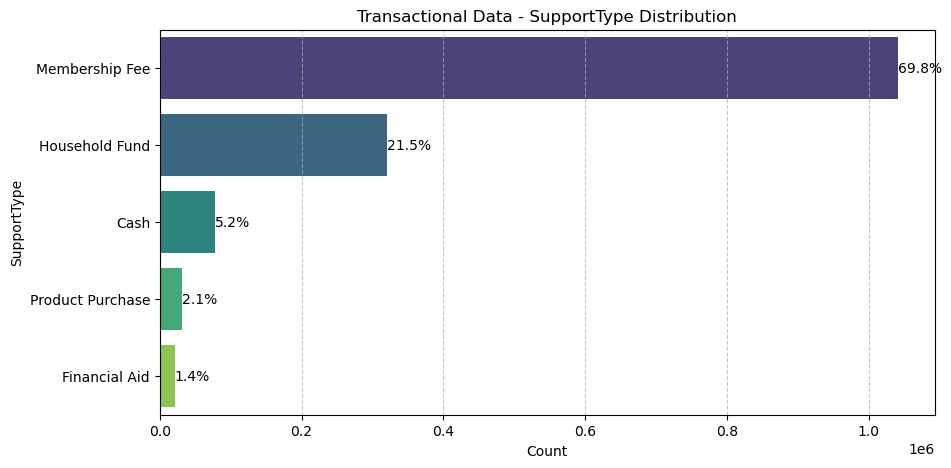

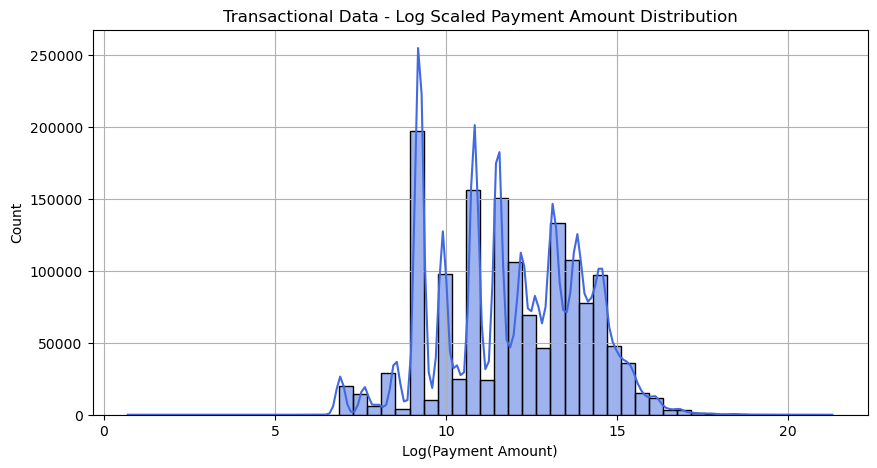

In [ ]:
# State translation mapping (Persian to English)
state_mapping = {
    'تهران': 'Tehran',
    'البرز': 'Alborz',
    'اصفهان': 'Isfahan',
    'فارس': 'Fars',
    'خوزستان': 'Khuzestan',
    'خراسان رضوی': 'Razavi Khorasan',
    'آذربایجان شرقی': 'East Azerbaijan',
    'مازندران': 'Mazandaran',
    'گیلان': 'Gilan',
    'کرمان': 'Kerman',
    'سیستان و بلوچستان': 'Sistan and Baluchestan',
    'هرمزگان': 'Hormozgan',
    'کرمانشاه': 'Kermanshah',
    'گلستان': 'Golestan',
    'لرستان': 'Lorestan',
    'همدان': 'Hamadan',
    'قم': 'Qom',
    'مرکزی': 'Markazi',
    'یزد': 'Yazd',
    'بوشهر': 'Bushehr',
    'اردبیل': 'Ardabil',
    'قزوین': 'Qazvin',
    'زنجان': 'Zanjan',
    'چهارمحال و بختیاری': 'Chaharmahal and Bakhtiari',
    'چهار محال و بختیاری': 'Chaharmahal and Bakhtiari',
    'آذربایجان غربی': 'West Azerbaijan',
    'کردستان': 'Kurdistan',
    'ایلام': 'Ilam',
    'کهگیلویه و بویراحمد': 'Kohgiluyeh and Boyer-Ahmad',
    'خراسان شمالی': 'North Khorasan',
    'خراسان جنوبی': 'South Khorasan',
    'سمنان': 'Semnan'
}
# --- Step 1: General Dataset Evaluation ---
def evaluate_dataset(df: pd.DataFrame, name):
    print(f"\n=== {name} Overview ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Numerical columns:", df.select_dtypes(include=['int64', 'float64']).columns.tolist())
    print("Categorical columns:", df.select_dtypes(include=['object']).columns.tolist())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

    # Clean Gender before plotting
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].replace({'زن': 'Female', 'مرد': 'Male'})

    # Translate State before plotting
    if 'State' in df.columns:
        df['State'] = df['State'].map(state_mapping).fillna(df['State'])

    # Visualize categorical columns
    for col in ['Gender', 'ReferralSource', 'SupportType']:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")

            plt.title(f"{name} - {col} Distribution")
            plt.xlabel("Count")
            plt.ylabel(col)

            # Calculate total count for percentages
            total = df[col].value_counts().sum()

            # Display percentages on bars
            for p in ax.patches:
                width = p.get_width()
                percentage = f'{(width / total) * 100:.1f}%'  # Format to 1 decimal place
                ax.annotate(percentage, (width + 2, p.get_y() + p.get_height() / 2), va='center')

            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.show()

    if 'PaymentAmount' in df.columns:
        plt.figure(figsize=(10, 5))

        # Log-transforming to handle skewed data (ignoring 0 values)
        df = df[df['PaymentAmount'] > 0]  # Remove zero or negative amounts if any
        log_payments = np.log1p(df['PaymentAmount'])  # log(1 + x) to avoid log(0)

        sns.histplot(log_payments, bins=50, kde=True, color='royalblue')
        plt.title(f"{name} - Log Scaled Payment Amount Distribution")
        plt.xlabel("Log(Payment Amount)")
        plt.ylabel("Count")
        plt.grid(True)

        plt.show()

    # Special handling for State: Show Tehran, Alborz, and "Other"
    if 'State' in df.columns:
        top_2_states = ['Tehran', 'Alborz']
        df['State_Grouped'] = df['State'].apply(lambda x: x if x in top_2_states else 'Other')
        state_order = ['Tehran', 'Alborz', 'Other']

        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x='State_Grouped', data=df, order=state_order, palette="coolwarm")
        plt.title(f"{name} - Distribution of States (Tehran, Alborz, Other)")
        plt.xlabel("State")
        plt.ylabel("Count")

        # Add percentages
        total_states = df['State_Grouped'].value_counts().sum()
        for p in ax.patches:
            height = p.get_height()
            percentage = f'{(height / total_states) * 100:.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height + 2), ha='center')

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

evaluate_dataset(benefactors_df, "Benefactors Data")
evaluate_dataset(transactional_df, "Transactional Data")

In [ ]:
# --- Data Cleaning ---
print("Missing Values Before:")
print(benefactors_df.isnull().sum())
print(transactional_df.isnull().sum())

def clean_data(df: pd.DataFrame, name):
    print(f"\n=== Cleaning {name} ===")

    # Create a copy to avoid modifying original DataFrame
    df = df.copy()

    # Clean Gender
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].replace({'زن': 'Female', 'مرد': 'Male'})

    # Clean State Names
    if 'State' in df.columns:
        df['State'] = df['State'].map(state_mapping).fillna(df['State'])

    # Convert BirthDate to Gregorian and compute Age
    if 'BirthDate_Gregorian' in df.columns:
        df['BirthDate_Gregorian'] = pd.to_datetime(df['BirthDate_Gregorian'], errors='coerce')

        # Define a fixed reference date
        reference_date = pd.to_datetime('2025-03-22')

        # Compute Age and filter invalid values
        df['Age'] = (reference_date - df['BirthDate_Gregorian']).dt.days // 365
        df = df.loc[(df['Age'] >= 0) & (df['Age'] <= 100)]  # Keep only realistic ages

        # Replace old BirthDate column
        df = df.drop(columns=['BirthDate'], errors='ignore')  # Drop original BirthDate if present
        df = df.rename(columns={'BirthDate_Gregorian': 'BirthDate'})  # Rename Gregorian column

    # Convert PaymentDate
    if 'PaymentDate' in df.columns:
        df['PaymentDate'] = pd.to_datetime(df['PaymentDate'], errors='coerce')

    print("Missing Values After Cleaning:")
    print(df.isnull().sum())

    return df

benefactors_df = clean_data(benefactors_df, "Benefactors Data")
transactional_df = clean_data(transactional_df, "Transactional Data")


Missing Values Before:
UserID                     0
Gender                   237
State                      0
BirthDate              56569
ReferralSource             0
BirthDate_Gregorian    56569
State_Grouped              0
dtype: int64
TransID          0
UserID           0
PaymentDate      0
PaymentAmount    0
SupportType      0
dtype: int64

=== Cleaning Benefactors Data ===
Missing Values After Cleaning:
UserID              0
Gender            126
State               0
ReferralSource      0
BirthDate           0
State_Grouped       0
Age                 0
dtype: int64

=== Cleaning Transactional Data ===
Missing Values After Cleaning:
TransID          0
UserID           0
PaymentDate      0
PaymentAmount    0
SupportType      0
dtype: int64


## Identifying Data Distribution


=== Benefactors Data Distribution ===
Skipping UserID (Unique Values: 221177)

🔹 Checking: Age


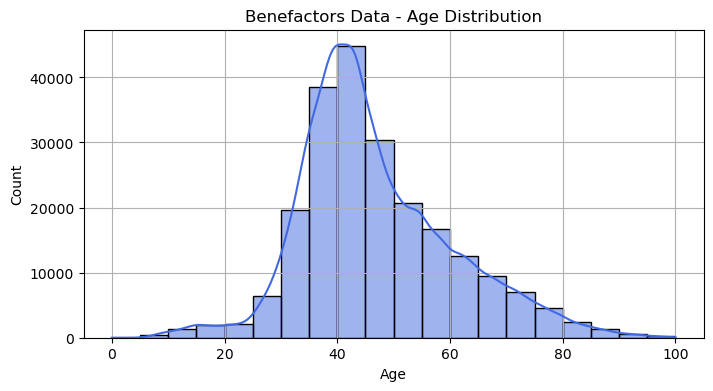

🔍 Age - Outliers (Z-score > 3): 1207

=== Transactional Data Distribution ===
Skipping TransID (Unique Values: 1490797)

🔹 Checking: UserID


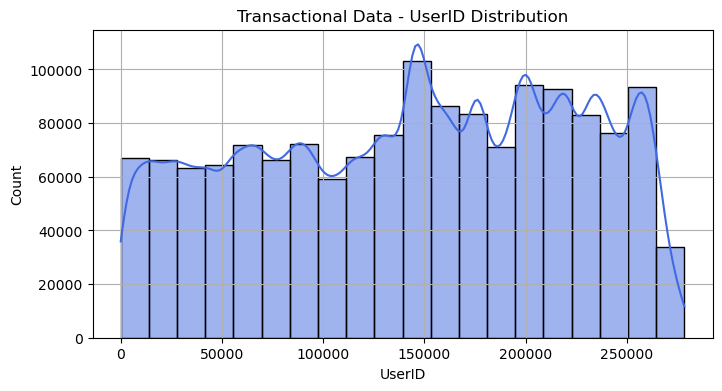

🔍 UserID - Outliers (Z-score > 3): 0

🔹 Checking: PaymentAmount
Skewed Data (Skewness=91.86) → Applying Log Transform


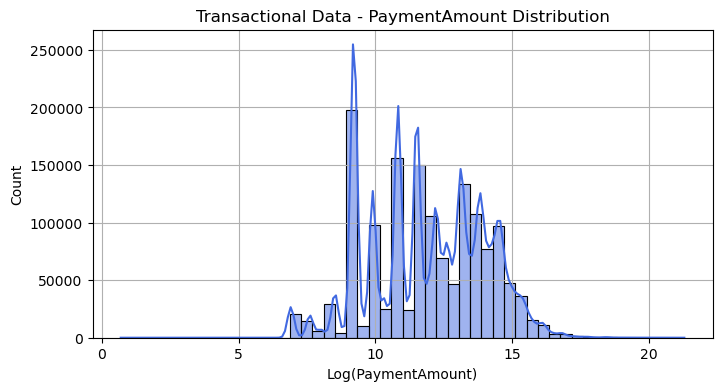

🔍 PaymentAmount - Outliers (Z-score > 3): 2967


In [ ]:
# --- Identifying Data Distribution ---
def check_distribution(df: pd.DataFrame, name):
    print(f"\n=== {name} Distribution ===")

    # Select only numerical columns, excluding unique ones
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        if df[col].nunique() == df.shape[0]:  # Skip unique columns (like IDs)
            print(f"Skipping {col} (Unique Values: {df[col].nunique()})")
            continue

        print(f"\n🔹 Checking: {col}")

        plt.figure(figsize=(8, 4))

        # Check for skewness and apply log transform if needed
        skewness = df[col].dropna().skew()
        if abs(skewness) > 1:
            print(f"Skewed Data (Skewness={skewness:.2f}) → Applying Log Transform")
            transformed_col = np.log1p(df[col].dropna())  # log(1 + x) to avoid log(0)
            sns.histplot(transformed_col, bins=50, kde=True, color="royalblue")
            plt.xlabel(f"Log({col})")
        else:
            sns.histplot(df[col].dropna(), bins=20, kde=True, color="royalblue")
            plt.xlabel(col)

        plt.title(f"{name} - {col} Distribution")
        plt.ylabel("Count")
        plt.grid(True)
        plt.show()

        # Calculate Outliers using Z-score
        z_scores = stats.zscore(df[col].dropna())
        outliers = np.sum(np.abs(z_scores) > 3)  # More efficient
        print(f"🔍 {col} - Outliers (Z-score > 3): {outliers}")

check_distribution(benefactors_df, "Benefactors Data")
check_distribution(transactional_df, "Transactional Data")


## Relationship Between Features


=== Benefactors Data Feature Relationships ===


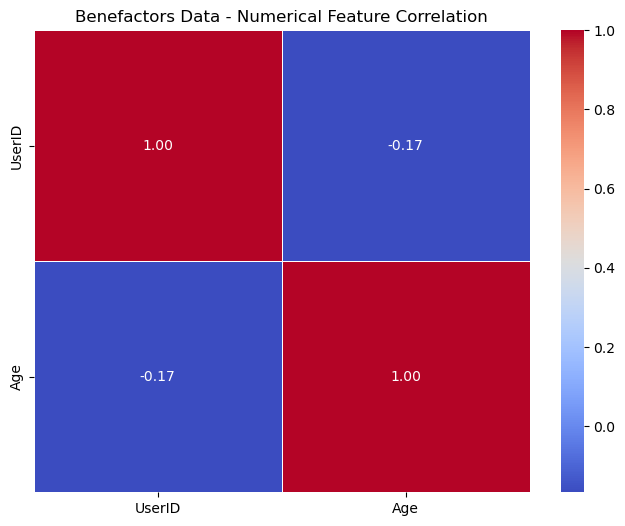

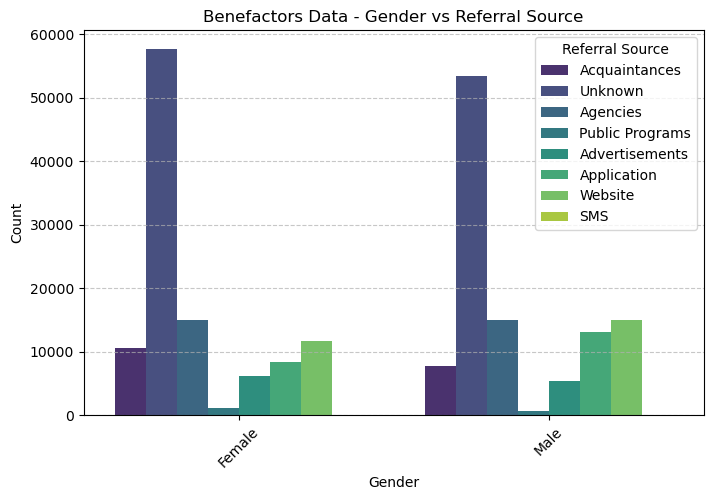

Skipping Support Type vs Payment Amount (Missing Columns)

=== Transactional Data Feature Relationships ===


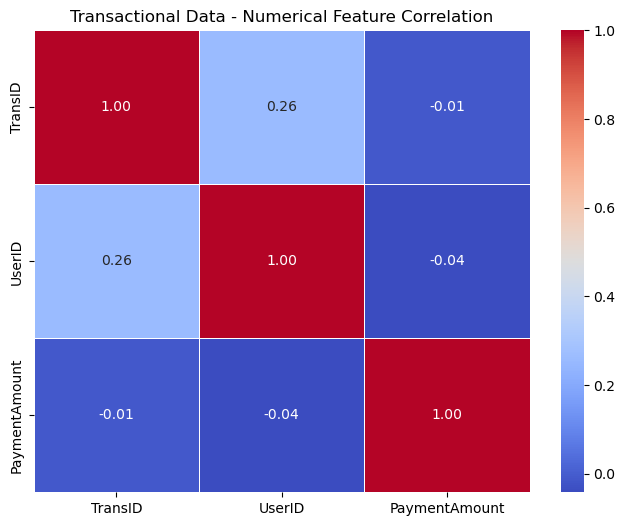

Skipping Gender vs Referral Source (Missing Columns)


C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\87565478.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SupportType', y='PaymentAmount', palette='coolwarm')


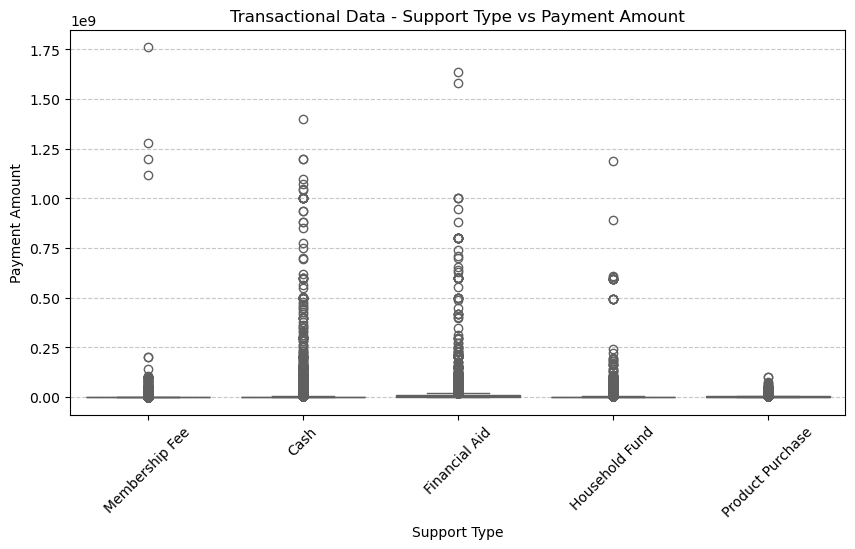

In [ ]:
def feature_relationship(df: pd.DataFrame, name):
    print(f"\n=== {name} Feature Relationships ===")

    # --- Numerical Feature Correlation ---
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if len(numerical_cols) > 1:  # Only plot if there are multiple numerical features
        corr = df[numerical_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title(f"{name} - Numerical Feature Correlation")
        plt.show()
    else:
        print("Not enough numerical columns for correlation heatmap.")

    # --- Categorical Relationships ---
    if 'Gender' in df.columns and 'ReferralSource' in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='Gender', hue='ReferralSource', palette='viridis')
        plt.title(f"{name} - Gender vs Referral Source")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.legend(title="Referral Source")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Skipping Gender vs Referral Source (Missing Columns)")

    if 'SupportType' in df.columns and 'PaymentAmount' in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x='SupportType', y='PaymentAmount', palette='coolwarm')
        plt.title(f"{name} - Support Type vs Payment Amount")
        plt.xlabel("Support Type")
        plt.ylabel("Payment Amount")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Skipping Support Type vs Payment Amount (Missing Columns)")

# Run the function on both datasets
feature_relationship(benefactors_df, "Benefactors Data")
feature_relationship(transactional_df, "Transactional Data")

## Aggregate data and explore the distributions of Recency, Frequency, TotalAmount (aggregation of PaymentAmount) and Duration

In [ ]:
# --- TransactionalData Specific Steps ---
filtered_transactions = transactional_df[transactional_df['PaymentAmount'] > 100000]
print(f"Filtered Transactions (PaymentAmount > 100,000): {filtered_transactions.shape}")

# Aggregate transactions per user (include both min & max PaymentDate for Duration)
agg_data = transactional_df.groupby('UserID').agg({
    'PaymentAmount': 'sum',
    'TransID': 'count',
    'PaymentDate': ['max', 'min']  # Needed for Duration calculation
}).rename(columns={'TransID': 'Frequency', 'PaymentAmount': 'TotalAmount'})

# Flatten multi-index columns
agg_data.columns = ['TotalAmount', 'Frequency', 'LastPaymentDate', 'FirstPaymentDate']

# Compute Recency (days since last transaction)
agg_data['Recency'] = (pd.Timestamp.today() - agg_data['LastPaymentDate']).dt.days

# Compute Duration (days between first & last transaction)
agg_data['Duration'] = (agg_data['LastPaymentDate'] - agg_data['FirstPaymentDate']).dt.days

# Drop unnecessary columns
agg_data = agg_data.drop(columns=['LastPaymentDate', 'FirstPaymentDate'])

# Categorize Recency, Frequency, TotalAmount & Duration using quantiles
for col in ['Recency', 'Frequency', 'TotalAmount', 'Duration']:
    unique_vals = agg_data[col].nunique()

    if unique_vals > 4:  # Ensure enough unique values for qcut
        try:
            agg_data[f"{col}_cat"] = pd.qcut(agg_data[col], q=4, labels=range(1, 5), duplicates='drop')
        except ValueError as e:
            print(f"qcut failed for {col}: {e}. Falling back to pd.cut.")
            if col == 'Frequency':  # Custom bins for Frequency
                bins = [0, 1, 3, 5, 10, float('inf')]  # Define meaningful bins
                labels = [1, 2, 3, 4, 5]  # Assign category scores
                agg_data[f"{col}_cat"] = pd.cut(agg_data[col], bins=bins, labels=labels)
            else:
                agg_data[f"{col}_cat"] = pd.cut(agg_data[col], bins=4, labels=range(1, 5))
    else:
        print(f"Skipping {col} categorization: Only {unique_vals} unique value(s)")
        agg_data[f"{col}_cat"] = 1

# Display results
print("\nAggregated Transactional Data:")
print(agg_data[['Recency', 'Recency_cat', 'Frequency', 'Frequency_cat', 'TotalAmount', 'TotalAmount_cat', 'Duration', 'Duration_cat']].head())

Filtered Transactions (PaymentAmount > 100,000): (767719, 5)
qcut failed for Frequency: Bin labels must be one fewer than the number of bin edges. Falling back to pd.cut.
qcut failed for Duration: Bin labels must be one fewer than the number of bin edges. Falling back to pd.cut.

Aggregated Transactional Data:
        Recency Recency_cat  Frequency Frequency_cat  TotalAmount  \
UserID                                                              
0          2449           1          3             2      2485000   
1          2474           2          1             1       150000   
2          3098           4          1             1      1000000   
3          2417           1         21             5      8476500   
4          2408           1          1             1       500000   

       TotalAmount_cat  Duration Duration_cat  
UserID                                         
0                    3       665            3  
1                    1         0            1  
2           

## BenefactorsData Exploration

In [36]:
# --- BenefactorsData Exploration ---
print("\n=== Benefactors Data Exploration ===")
print("Unique States:", benefactors_df['State'].nunique())
print("Gender Distribution:", benefactors_df['Gender'].value_counts())
print("Most Common Referral Source:", benefactors_df['ReferralSource'].mode()[0])
print("Average Age by Gender:", benefactors_df.groupby('Gender')['Age'].mean())


=== Benefactors Data Exploration ===
Unique States: 33
Gender Distribution: Gender
Female    110697
Male      110354
Name: count, dtype: int64
Most Common Referral Source: Unknown
Average Age by Gender: Gender
Female    47.194784
Male      46.252641
Name: Age, dtype: float64


C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\267845412.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=agg_data[col], palette='coolwarm', ax=axes[i])
C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\267845412.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=agg_data[col], palette='coolwarm', ax=axes[i])
C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\267845412.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=agg_data[col], palette='coolwarm', ax=axes[i])
C:\Users\ctcxr\AppData\Local\Temp\ipykernel_16124\26784

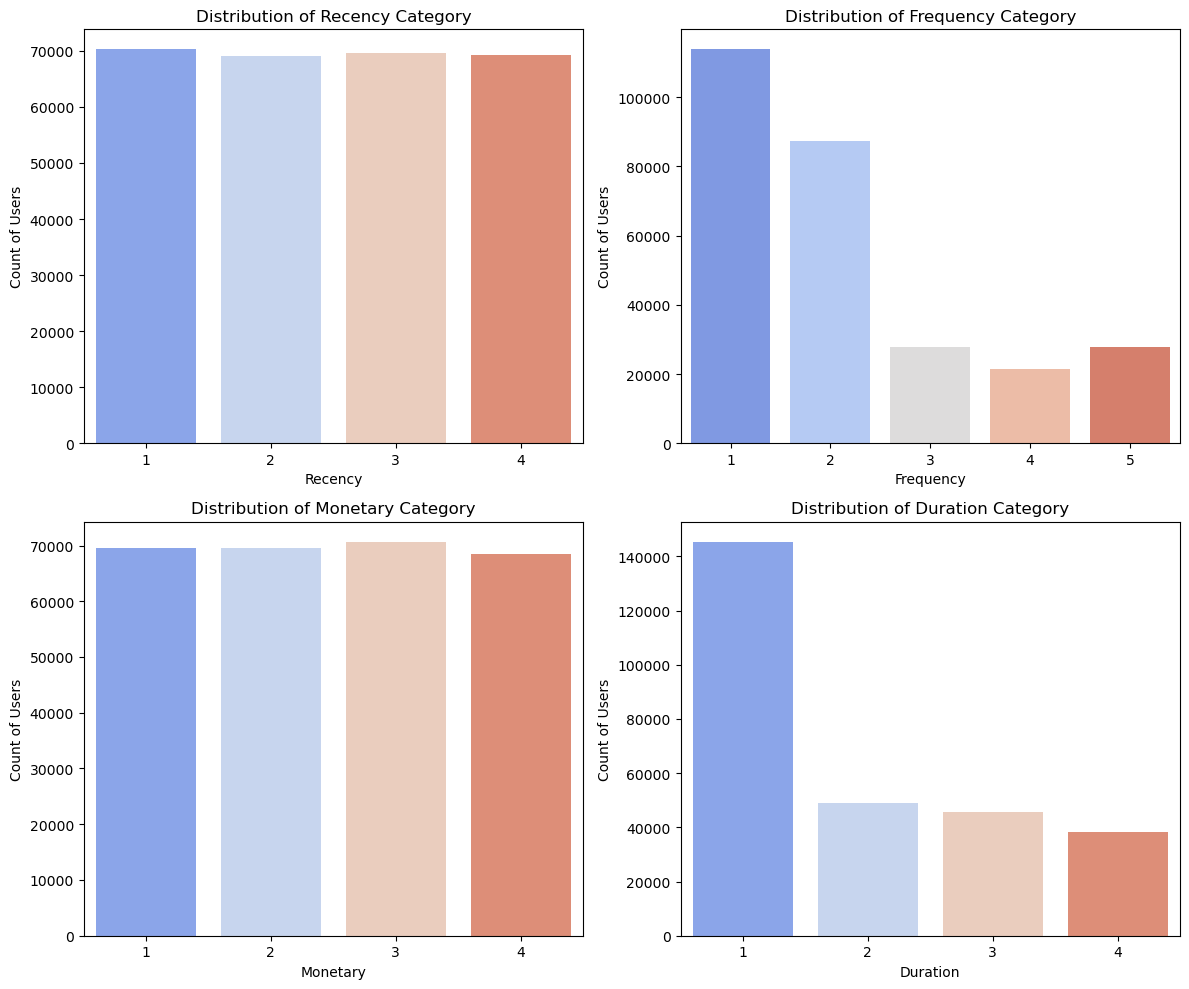

In [37]:
# Define categories to plot
rfm_d_categories = ['Recency_cat', 'Frequency_cat', 'TotalAmount_cat', 'Duration_cat']
category_labels = ['Recency', 'Frequency', 'Monetary', 'Duration']

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through categories and plot bar plots
for i, col in enumerate(rfm_d_categories):
    if col in agg_data.columns:
        sns.countplot(x=agg_data[col], palette='coolwarm', ax=axes[i])
        axes[i].set_title(f"Distribution of {category_labels[i]} Category")
        axes[i].set_xlabel(category_labels[i])
        axes[i].set_ylabel("Count of Users")

# Adjust layout
plt.tight_layout()
plt.show()


=== Combined Data Sample ===
   UserID  Gender   State ReferralSource  BirthDate State_Grouped   Age  \
0       3  Female  Tehran  Acquaintances 1984-11-07        Tehran  40.0   
1       8    Male  Tehran  Acquaintances 1985-09-15        Tehran  39.0   
2      14    Male  Tehran  Acquaintances 1977-09-29        Tehran  47.0   
3      17  Female  Tehran  Acquaintances 1946-10-15        Tehran  78.0   
4      18  Female  Tehran  Acquaintances 1955-12-28        Tehran  69.0   

   TotalAmount  Frequency  Recency  Duration Recency_cat Frequency_cat  \
0    8476500.0       21.0   2417.0     824.0           1             5   
1    7364000.0        1.0   3032.0       0.0           4             1   
2    3200000.0        2.0   2659.0     232.0           3             2   
3   57840000.0        8.0   2441.0     739.0           1             4   
4    2248000.0        1.0   2870.0       0.0           4             1   

  TotalAmount_cat Duration_cat  Log_TotalAmount  
0               4       

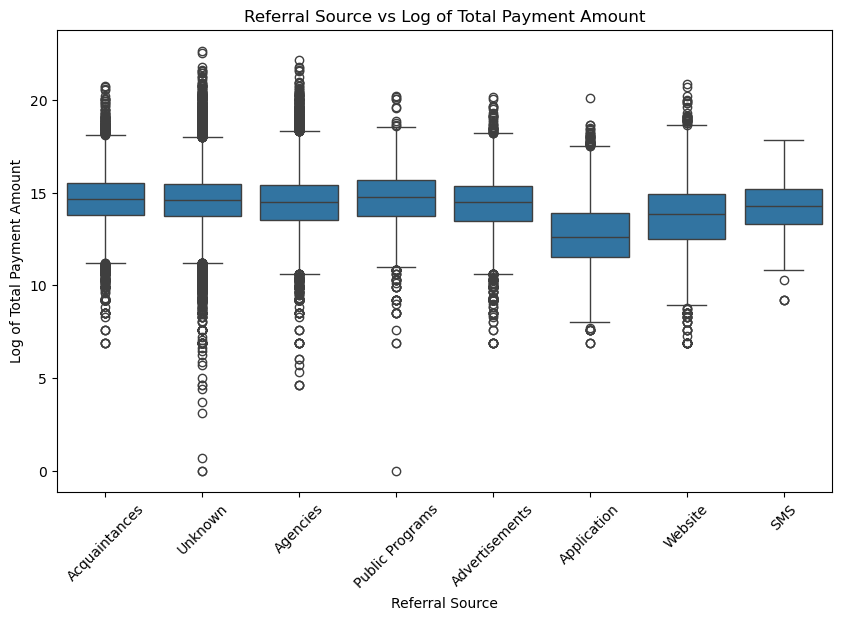

In [38]:
# --- Combined Analysis ---
# Merge benefactors data with aggregated transactional data
combined_df = pd.merge(benefactors_df, agg_data, on='UserID', how='left')

# Fill missing TotalAmount values with 0
combined_df['TotalAmount'] = combined_df['TotalAmount'].fillna(0)

# Log transformation to handle skewed payment amounts
combined_df['Log_TotalAmount'] = np.log1p(combined_df['TotalAmount'])

# Display sample data
print("\n=== Combined Data Sample ===")
print(combined_df.head())

# Boxplot to analyze Referral Source vs Total Payment Amount (Log Scale)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ReferralSource', y='Log_TotalAmount', data=combined_df)
plt.title("Referral Source vs Log of Total Payment Amount")
plt.xlabel("Referral Source")
plt.ylabel("Log of Total Payment Amount")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Export the prepared dataset
import os
output_dir = 'dataset_prepared'
os.makedirs(output_dir, exist_ok=True)
combined_df.to_csv(os.path.join(output_dir, 'prepared_data.csv'), index=False)